In [1]:
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from localization.experiments.ica import get_mixing_matrix

In [2]:
def plot10(W):
    n = int(jnp.sqrt(W.shape[1]))
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            im = axs[i,j].imshow(W[5 * i + j,:].reshape(n, n), cmap='gray')
            cbar = fig.colorbar(im)
            axs[i,j].set_title(f"{5 * i + j}")
    fig.tight_layout()
    return fig, axs

In [3]:
# ica_result = jnp.load('/Users/leonlufkin/Documents/GitHub/Localization/localization/results/weights/ica_NonlinearGPDataset_L=400_xi=_xi1=03.00_xi2=03.00.npz', allow_pickle=True)
ica_result = jnp.load('/Users/leonlufkin/Documents/GitHub/Localization/localization/results/weights/ica_test.npz', allow_pickle=True)
raw_mixing_matrices = ica_result['raw_mixing_matrices']
mixing_matrices = ica_result['mixing_matrices']
metrics = ica_result['metrics']
Wz = ica_result['Wz']
print(ica_result['mean'])

[-1.24958055e-02 -5.16785658e-04 -5.11391205e-04  5.99332293e-03
  8.46104603e-03 -5.80247666e-04  2.92204646e-03  8.31442699e-03
  1.45269576e-02  7.39988266e-03  3.02743213e-03  5.06739737e-03
 -6.15999056e-03 -1.24729006e-03  7.00127287e-03  1.87356435e-02
  1.55531149e-02  7.60335755e-03  1.14755975e-02  6.65241946e-03
  1.42103911e-03 -5.77894924e-03 -6.24187198e-03 -7.45186396e-03
  8.64499807e-03  1.77211873e-02  2.30891109e-02  2.03375686e-02
  2.36300123e-03 -7.36756204e-03 -1.52381486e-04 -6.47659879e-04
 -6.57713553e-03 -9.11691040e-03 -4.12863307e-03 -6.85165497e-03
  1.09480750e-02  2.05782223e-02  1.79187041e-02  7.79937580e-03
 -7.68240774e-03 -1.57109108e-02 -1.11352829e-02 -6.14218321e-03
 -7.34768528e-03 -4.36981861e-03  7.63459178e-03  4.83984454e-03
 -8.15562624e-03 -4.87370044e-03 -5.29883942e-03 -6.58365013e-03
 -5.18229790e-03 -3.91027378e-03 -1.08905826e-02 -1.25538334e-02
 -6.55439589e-03  1.24145532e-03  9.19548608e-03 -8.19382985e-05
 -1.38474451e-02 -8.92073

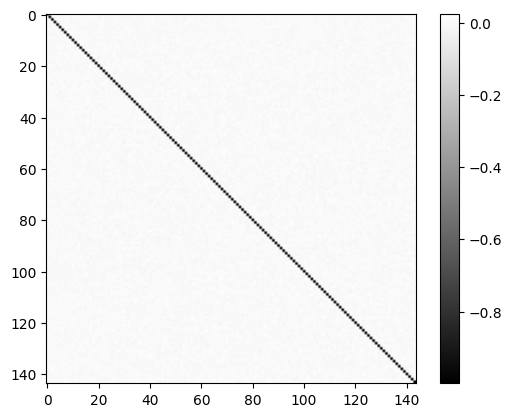

In [4]:
im = plt.imshow(get_mixing_matrix(raw_mixing_matrices[-1]), cmap='gray')
cbar = plt.colorbar(im)

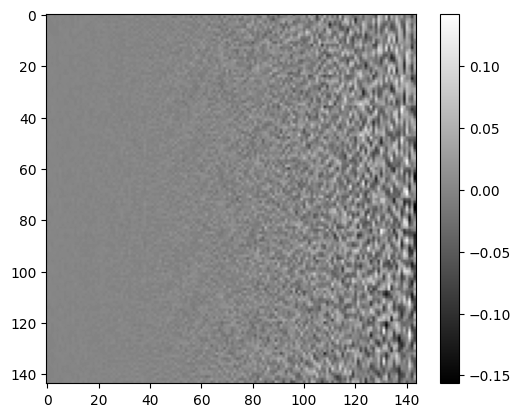

In [5]:
# scenes
Wi = mixing_matrices[-1]
A = jnp.linalg.inv(Wi)
im = plt.imshow(A, cmap='gray')
cbar = plt.colorbar(im)

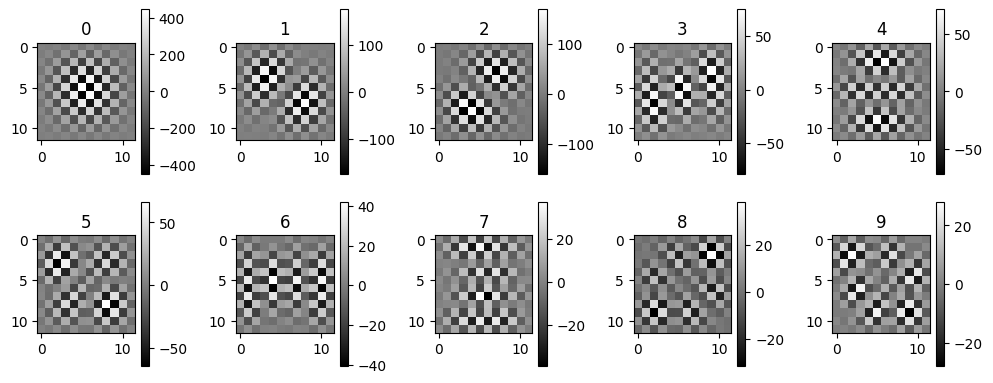

In [7]:
fig, axs = plot10(Wi)

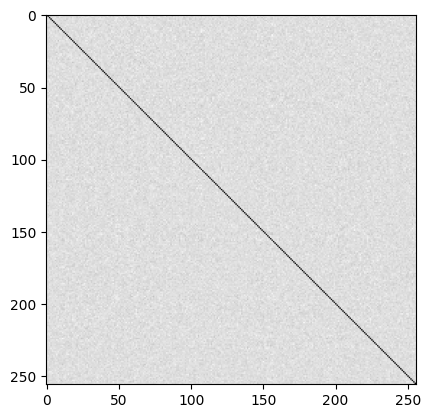

In [9]:
_ = plt.imshow(get_mixing_matrix(raw_mixing_matrices[0]), cmap='gray')

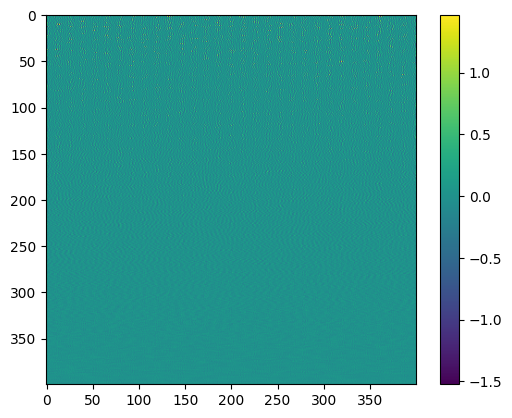

In [29]:
# (6, 6)
ind = np.where(np.isnan(mixing_matrices).sum(axis=-1).sum(axis=-1) == 0)[0][-1]
Wi = mixing_matrices[ind]
im = plt.imshow(Wi)
cbar = plt.colorbar(im)

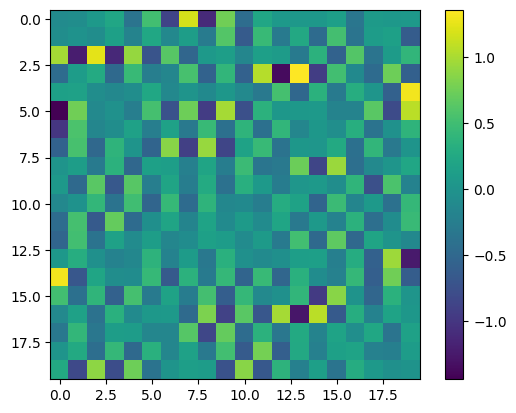

In [31]:
im = plt.imshow(Wi[0].reshape(20, 20))
cbar = plt.colorbar(im)

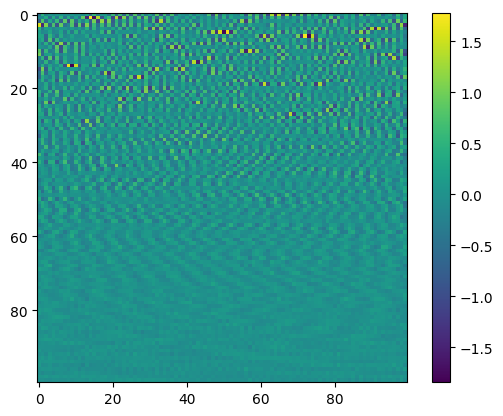

In [14]:
# (3, 3)
Wi = mixing_matrices[-1]
im = plt.imshow(Wi)
cbar = plt.colorbar(im)

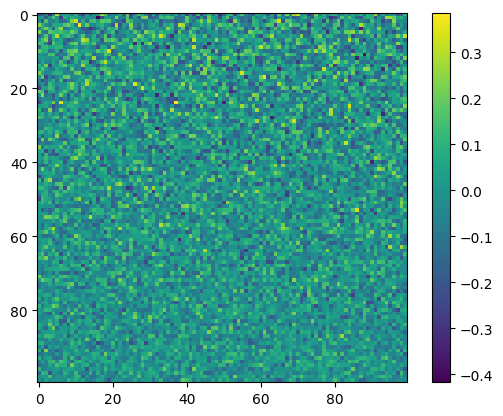

In [11]:
# (0.1, 0.1)
Wi = mixing_matrices[-1]
im = plt.imshow(Wi)
cbar = plt.colorbar(im)

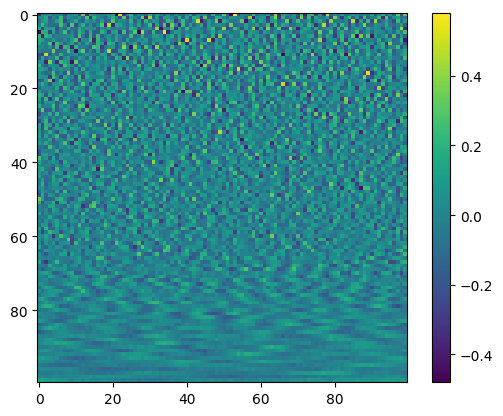

In [5]:
# (3, 0.1)
Wi = mixing_matrices[-1]
im = plt.imshow(Wi)
cbar = plt.colorbar(im)

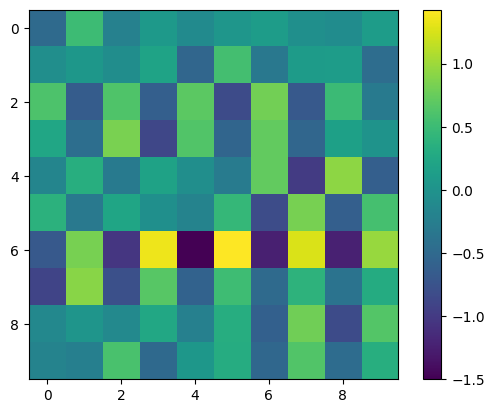

In [19]:
im = plt.imshow(Wi[0].reshape(10, 10))
cbar = plt.colorbar(im)

### Reading in Olshausen images

In [5]:
from localization import datasets
dataset = datasets.ScenesDataset(key=jax.random.PRNGKey(0), side_length=16,)
x = dataset[:10000][0]

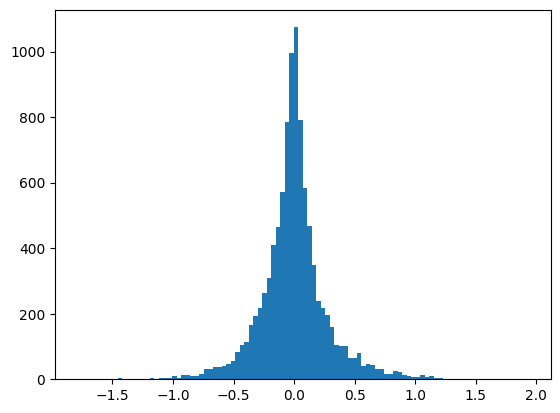

In [6]:
_ = plt.hist(x[:,1], bins=100)

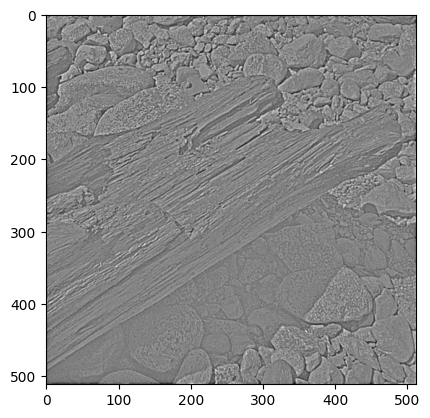

In [7]:
scene = dataset.scenes[0]
_ = plt.imshow(scene, cmap='gray')

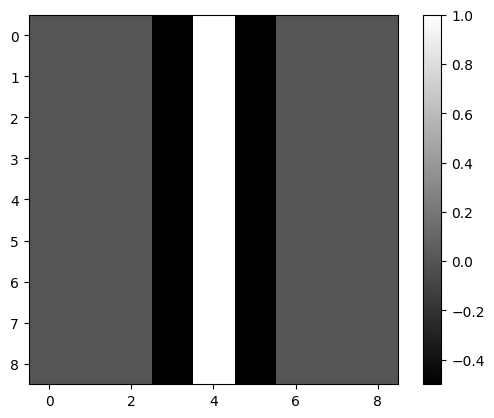

In [20]:
k = 9
def gauss_kernel(k, p):
    x = jnp.tile(jnp.abs(jnp.arange(k) - (k//2)) ** 2, (k, 1))
    x = jnp.exp(-(x + x.T) / p) / (2*jnp.pi*p) # p not sqrt(p) b/c 2-dimensional
    return x
# on_center_off_surround = gauss_kernel(k, 0.5) - gauss_kernel(k, 1)
on_center_off_surround = gauss_kernel(k, 0.5) - gauss_kernel(k, 1.5)
edge_detector = np.zeros((k, k))
edge_detector[k//2-1] = -0.5
edge_detector[k//2] = 1.
edge_detector[k//2+1] = -0.5
edge_detector = edge_detector.T
# edge_detector = edge_detector * edge_detector.T
im = plt.imshow(edge_detector, cmap='gray')
# im = plt.imshow(on_center_off_surround)
cbar = plt.colorbar(im)

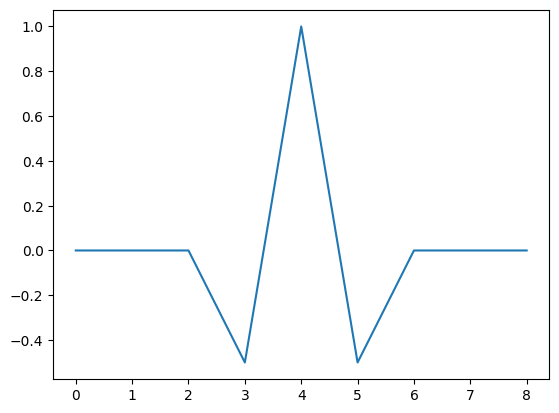

In [22]:
# _ = plt.plot( on_center_off_surround[4] )
_ = plt.plot( edge_detector[4] )

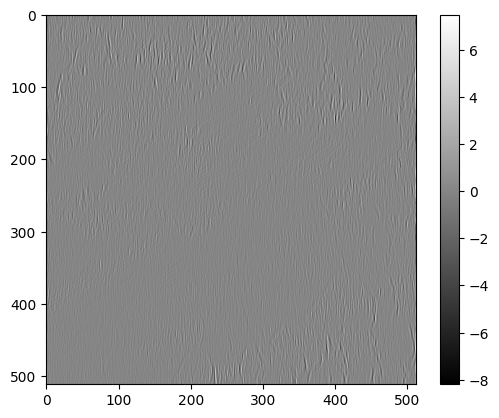

In [23]:
from scipy.signal import convolve2d
# ret = convolve2d(scene, on_center_off_surround, mode='same')
ret = convolve2d(scene, edge_detector, mode='same')
# ret = convolve2d(jnp.ones((512, 512)), on_center_off_surround, mode='same')
im = plt.imshow(ret, cmap='gray')
cbar = plt.colorbar(im)

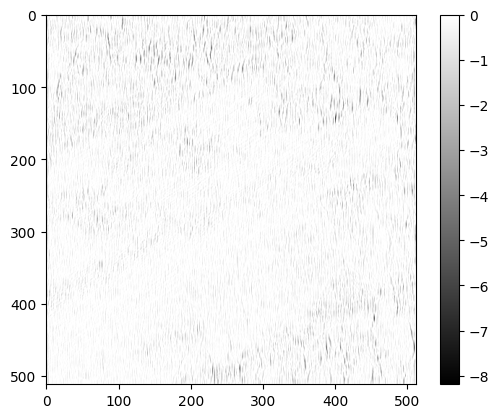

In [24]:
ret_ = ret.copy()
ret_[ret > 0] = 0
im = plt.imshow(ret_, cmap='gray')
cbar = plt.colorbar(im)

9.881343


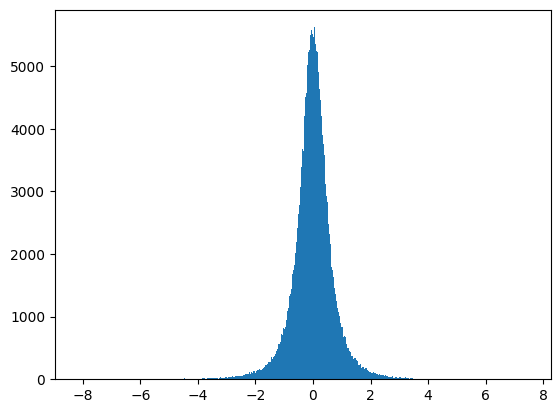

In [26]:
ret_ = ret.flatten() - jnp.mean(ret.flatten())
kurt = jnp.mean(ret_**4) / jnp.mean(ret_**2)**2
print(kurt)
_ = plt.hist( ret.flatten(), bins=600 )

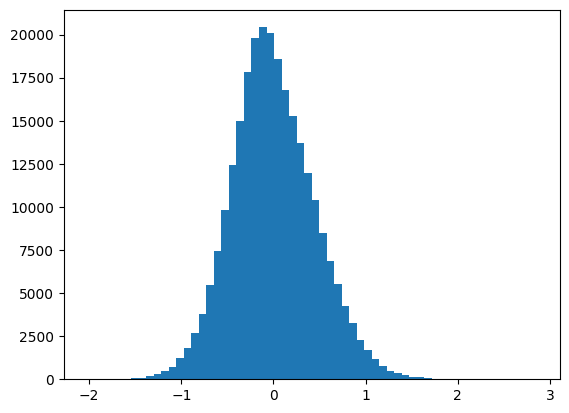

In [154]:
_ = plt.hist( scene.flatten(), bins=60 )

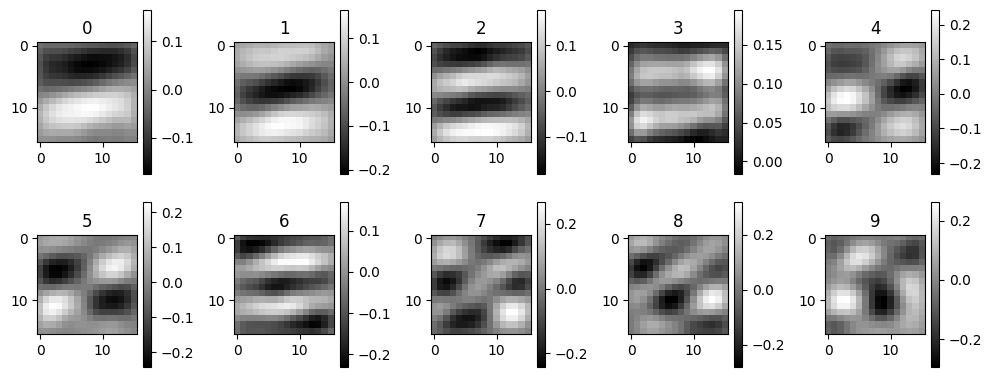

In [26]:
x, _ = dataset[:100000]
xx = jnp.cov(x.T)
eval, evec = jnp.linalg.eigh(xx)
eval, evec = eval[::-1], evec[:,::-1]
Wp = jnp.diag(1/jnp.sqrt(eval)) @ jnp.transpose(evec)
fig, axs = plot10(Wp)

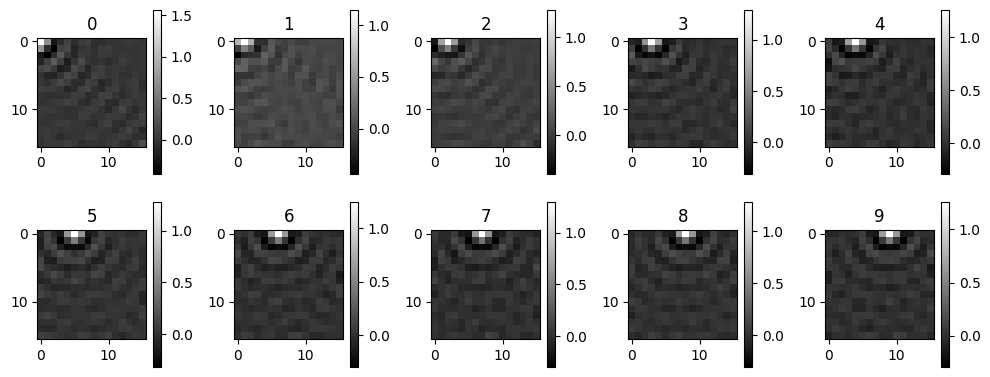

In [68]:
thresh = (eval > 0.05)
eval_ = eval[thresh]
evec_ = evec[:,thresh]
Wz = evec_ @ jnp.diag(1/jnp.sqrt(eval_)) @ evec_.T
fig, axs = plot10(Wz)

#### Trying sklearn package

In [1]:
from sklearn.decomposition import FastICA
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from localization import datasets

def plot10(W):
    n = int(jnp.sqrt(W.shape[1]))
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    for i in range(2):
        for j in range(5):
            im = axs[i,j].imshow(W[5 * i + j,:].reshape(n, n), cmap='gray')
            cbar = fig.colorbar(im)
            axs[i,j].set_title(f"{5 * i + j}")
    fig.tight_layout()
    return fig, axs

In [40]:
# dataset = datasets.ScenesDataset(key=jax.random.PRNGKey(0), side_length=20,)
# dataset = datasets.NonlinearGPDataset(key=jax.random.PRNGKey(0), xi=(3., 0.1), gain=100, num_dimensions=100, dim=1)
dataset = datasets.NortaDataset(key=jax.random.PRNGKey(0), xi=(3., 1), marginal_qdf=datasets.AlgQDF(k=30), num_dimensions=100, dim=1)
X = dataset[:100000][0]
transformer = FastICA(n_components=10, algorithm='deflation', random_state=0, whiten='unit-variance')
X_transformed = transformer.fit_transform(X)

Approximate standard deviation: 0.5801674127578735


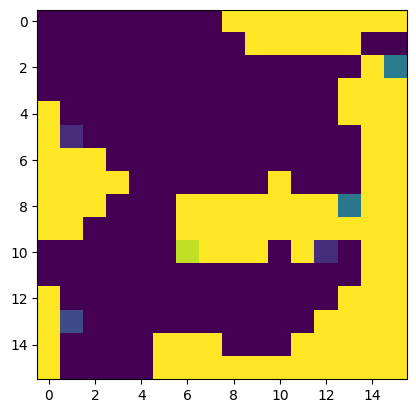

In [6]:
_ = plt.imshow(X[0].reshape(16, 16))

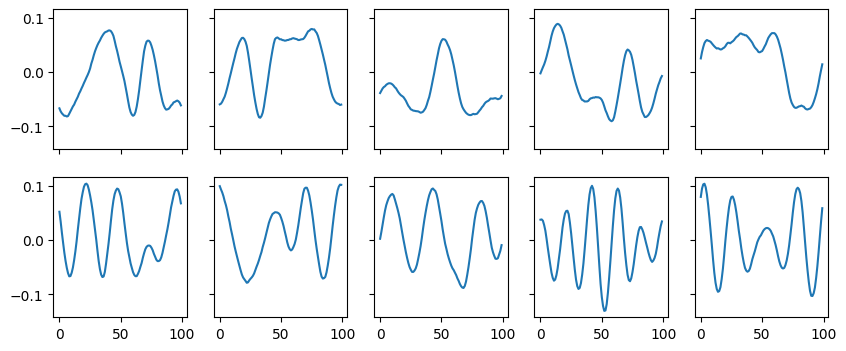

In [41]:
W = transformer.components_#[::-1]
# fig, axs = plot10(W)
# _ = plt.imshow(W[0].reshape(16, 16))
# plt.show()
# _ = plt.imshow(W[1].reshape(16, 16))
fig, axs = plt.subplots(2, 5, figsize=(10, 4), sharey=True, sharex=True)
for i, ax in enumerate(axs.flatten()):
    ax.plot(W[i])

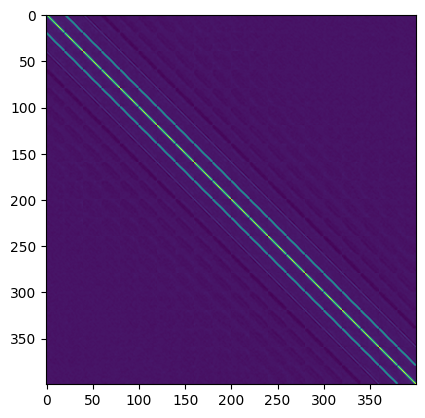

In [7]:
Z = X @ transformer.whitening_.T
_ = plt.imshow(np.cov(X.T))

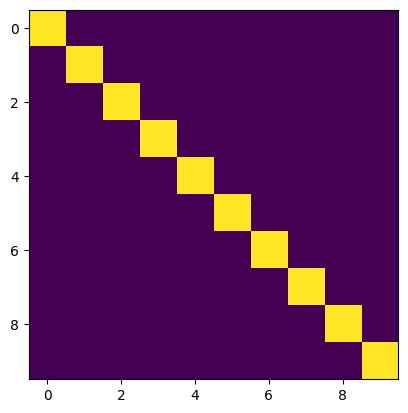

In [8]:
_ = plt.imshow(np.cov(Z.T))